# Gradient Descent Tutorial

We are going to implement our first gradient descent in Python. This is tutorial is from [**this material**](https://www.kaggle.com/tentotheminus9/linear-regression-from-scratch-gradient-descent).

We are using two variables from our dataset with prices of houses. You can use the one you've already downloaded or download it from [**here**](https://drive.google.com/file/d/1rca0X0lIPey2xw60EBV6_DVJkmWp4afi/view?usp=sharing).

In [5]:
# Firstly, we are going to import important packages
import numpy as np # linear algebra
import pandas as pd # obvious reasons :)

In [6]:
# Libraries for visualizations
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [7]:
data_path = "data"
data = pd.read_csv(data_path + '/train.csv')

We are going to work with 1 variable only. For this example it's **GrLivArea**. We will scale and add columns of 1s. This is because we want to find **intercept** as well (we did add the constant in the tutorial yesterday as well). 

In [8]:
x = data['GrLivArea']
y = data['SalePrice']

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

In [11]:
#GRADIENT DESCENT

alpha = 0.01 #Step size
iterations = 2000 #No. of iterations
m = y.size #No. of data points
np.random.seed(123) #Set the seed
theta = np.random.rand(2) #Pick some random values to start with - we are estimating 2 coeficients: 1 for the variable and 1 for intercept

We are using term **cost** in the function below. This can be linked to the **Sum of the Squared Residuals** from the earlier [video](https://www.youtube.com/watch?v=sDv4f4s2SB8&t=1173s).

In [12]:
#GRADIENT DESCENT
def gradient_descent(x, y, theta, iterations, alpha):
    # prepare the empty lists for our history
    past_costs = []
    past_thetas = [theta]
    # repeating for number of iteration times
    for i in range(iterations):
        # computing of prediction. Dot product of coeficients and values
        prediction = np.dot(x, theta)
        # computation of error
        error = prediction - y
        # computation of overall cost for each iteration
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        # GRADIENT DESCENT part
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

#Pass the relevant variables to the function and get the new values back...
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 180921.20, 56294.90


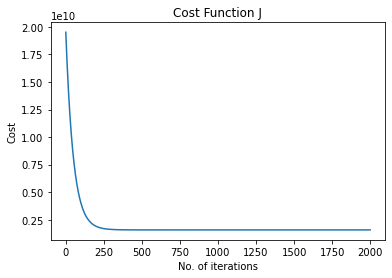

In [13]:
#Plot the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

We will try to animate the descent:

1. we export the gif of how the regression line is moving through the data
2. we load the git back and show it in the notebook.

In [14]:
#Animation

#Set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = past_thetas[i][1]*x + past_thetas[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.2f e10' % (past_costs[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=0, blit=True)

# export of .gif
anim.save('animation.gif', writer='imagemagick', fps = 30)

MovieWriter imagemagick unavailable; using Pillow instead.



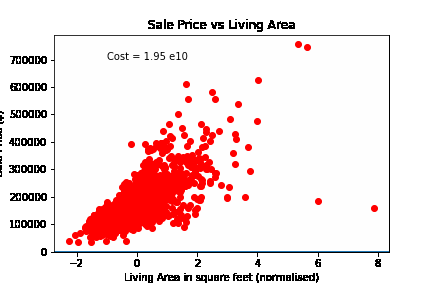

In [15]:
#Display the animation...
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

## Stretch content

Try to choose 4 more variables and adjust the function to predict the coeficients for all predictors